In [ ]:
# install.packages("boot")  #скачивание библиотеки для бутстрэп-анализа
# library("boot") #подключение библиотеки

# install.packages("bootstrap")  #скачивание библиотеки для jackknife
# library("bootstrap") #подключение библиотеки

# install.packages("coin") #скачивание библиотеки для перестановочных тестов
# library(coin) #подключение библиотеки

library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<ht

In [ ]:
library(readr)
library(readxl)
library(dplyr)
library("magrittr")


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [ ]:
hdl <- read_tsv('/content/high_density_lipids.tsv')%>%
  dplyr::select(-Name)%>%
  mutate(Patient.number = as.factor(Patient.number),
          Vial.number = as.factor(Vial.number))
ldl <- read_tsv('/content/low_density_lipids.tsv')%>%
  dplyr::select(-Name)%>%
  mutate(Patient.number = as.factor(Patient.number),
          Vial.number = as.factor(Vial.number))
meta <- read_xlsx('/content/metadata.xlsx', sheet = 1)

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
description <- read_xlsx('/content/metadata.xlsx', sheet = 2)

In [ ]:
df_patients <- meta[c('Vial number', 'Patient number', 'Name')]

In [ ]:
description[[1]][10] <-'LVH'

In [ ]:
# Найдем пересекающиеся значения в meta и description
new <- names(meta)[c(na.omit(match(description[[1]],names(meta)) ))]
desc <-description[[2]][c(match( names(meta)[c(na.omit(match(description[[1]],names(meta)) ))],description[[1]]))]

In [ ]:
desc_data <- data.frame(new, desc)

In [ ]:
library(glue)

In [ ]:
for (i in names(meta)){
  #if (i %in% new) attr(meta[glue('{i}')], 'label') <- desc_data[desc_data$new == i, ]$desc
  if (i %in% new) colnames(meta)[colnames(meta) == glue('{i}')] = desc_data[desc_data$new == i, ]$desc
}


In [ ]:
col_factor = c('Sucrose', 'Group', 'smoking','diabetes','hypertension',
'Left ventricular hypertrophy by electrocardiogram','IHD','medical history of infarction','medical history of stroke',
'family history of CAD','family history hypertension','family history diabetes', 'Plaque','Statins','comorbidities')

In [ ]:
meta[col_factor] <- lapply(meta[col_factor], factor)

In [ ]:
meta <- (meta %>% rename_with(make.names) %>%
  dplyr::select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number), Vial.number = as.factor(Vial.number)))
meta

Vial.number,Patient.number,Sucrose,Group,Date,Age,Plasma.volume,growth,the.weight,body.mass.index,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<fct>,<fct>,<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,50,0,0,2022-03-26,63,6.5,163,84.0,31.61579,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,51,0,0,2023-12-23,47,5.5,179,111.0,34.64311,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,52,0,1,2022-10-10,57,7.0,164,80.0,29.74420,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,0,1,2022-12-21,72,5.0,160,58.8,22.96875,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,54,0,1,2023-03-16,57,5.0,180,71.0,21.91358,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,55,0,1,2023-03-25,79,6.2,160,64.0,25.00000,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"
7,56,0,1,2022-01-06,61,6.5,164,67.0,24.91077,⋯,0.91,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis
8,57,0,1,2022-01-27,70,5.5,162,61.0,23.24341,⋯,1.00,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis"
9,58,0,0,2023-10-20,50,6.0,150,79.0,35.11111,⋯,1.09,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia


In [ ]:
install.packages('corrplot')
library (corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



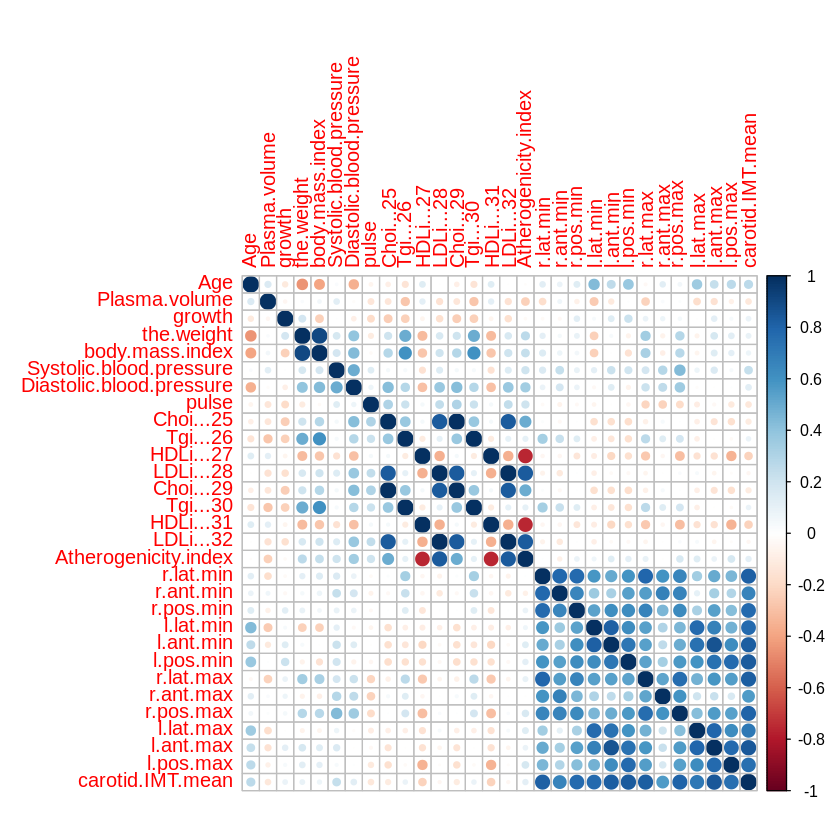

In [ ]:
#корреляционная матрица
corrplot(cor(select(meta, where(is.numeric))))

In [ ]:
library(ggplot2)
install.packages('car')
library('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:boot’:

    logit




In [ ]:
model <- glm(Statins ~ Choi...25 + body.mass.index , data = meta, family = binomial())

#view the output of the regression model
summary(model)


Call:
glm(formula = Statins ~ Choi...25 + body.mass.index, family = binomial(), 
    data = meta)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)      6.90804    3.38139   2.043  0.04106 * 
Choi...25       -0.03328    0.01255  -2.651  0.00802 **
body.mass.index  0.01196    0.07871   0.152  0.87927   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.973  on 36  degrees of freedom
Residual deviance: 38.238  on 34  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 44.238

Number of Fisher Scoring iterations: 4


In [ ]:
exp(model$coefficients)

(Intercept)       Choi...25 body.mass.index 
   1000.2879883       0.9672636       1.0120271

In [ ]:
exp(confint(model))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),2.460789,1.999814e+06
Choi...25,0.940435,9.888798e-01
body.mass.index,0.868103,1.192535e+00


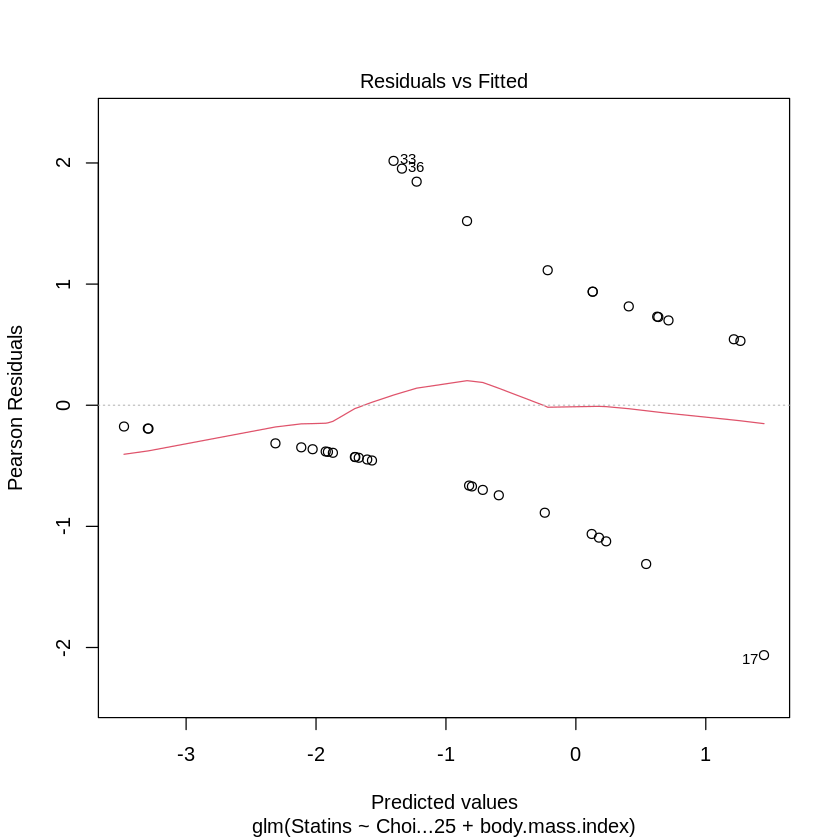

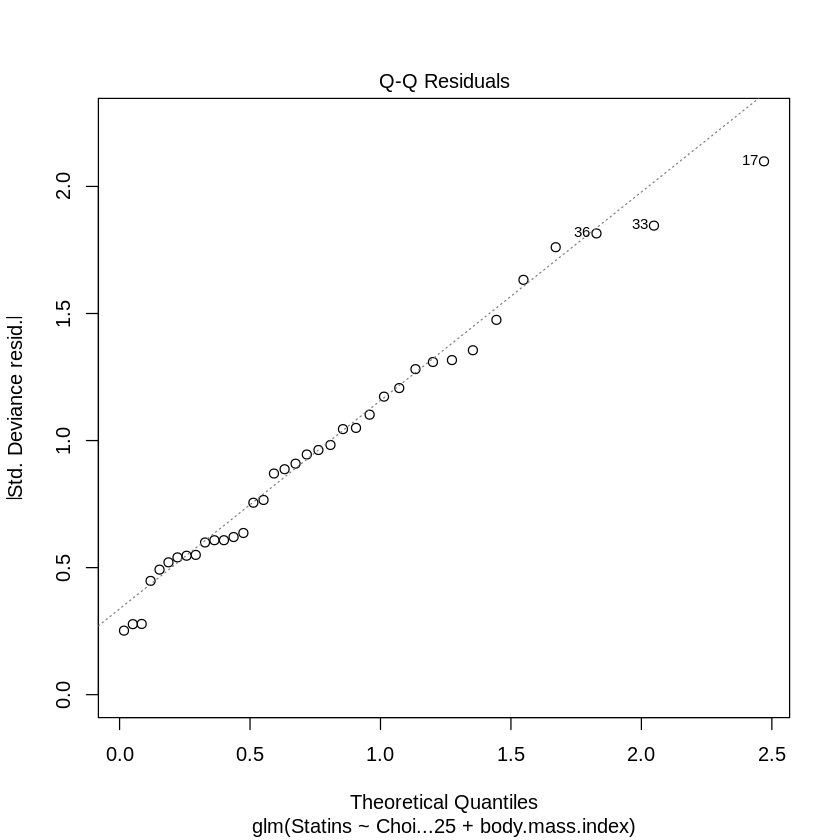

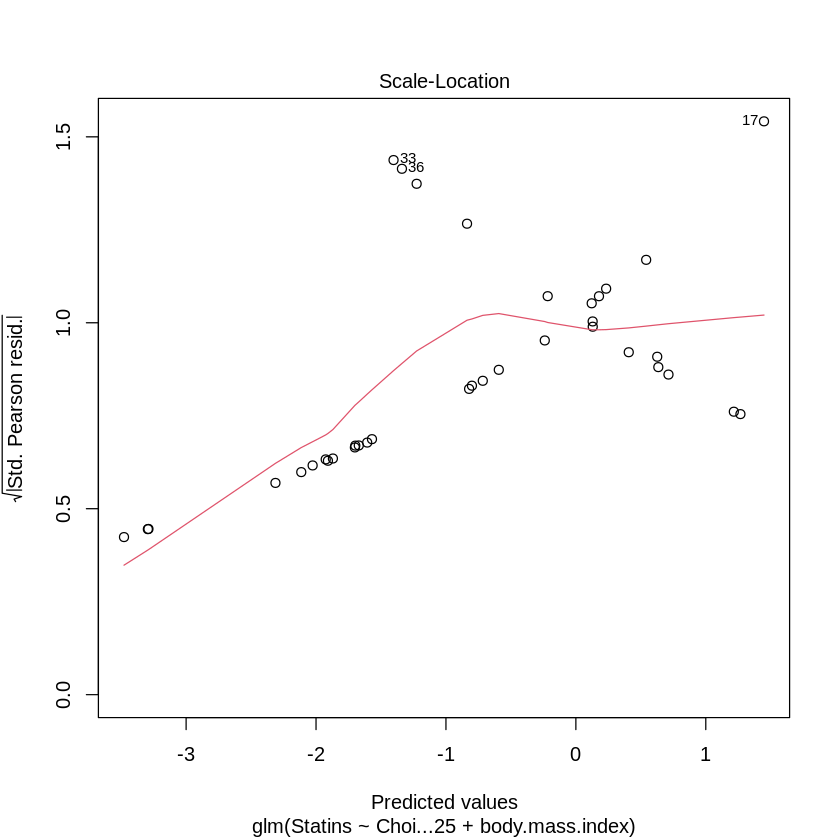

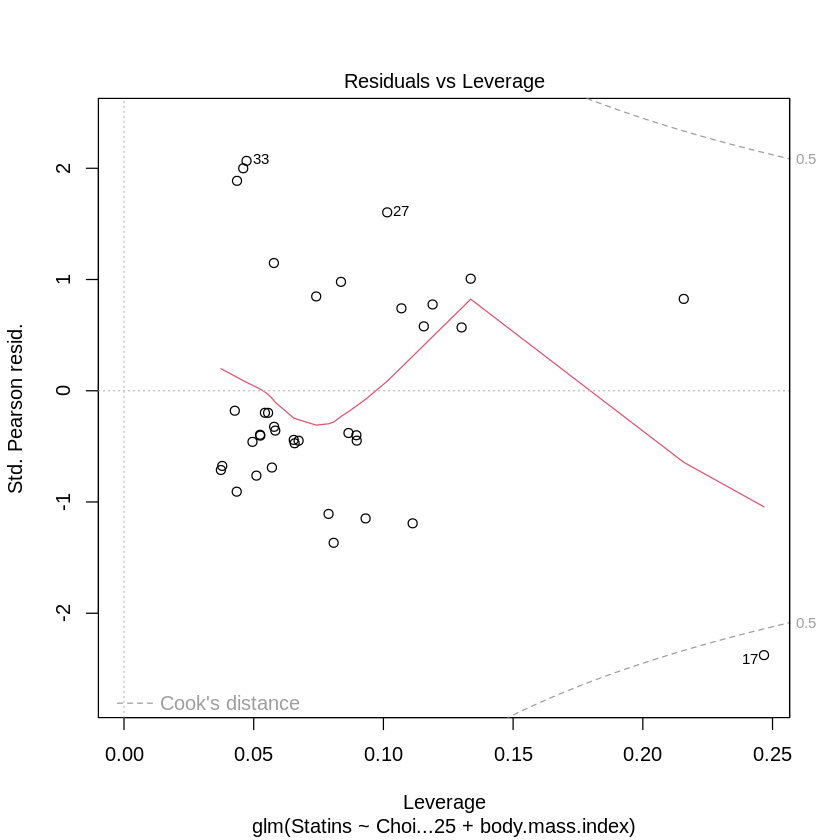

In [ ]:
plot(model)

In [ ]:
vif(model)

Choi...25 body.mass.index 
       1.018117        1.018117

In [ ]:
model_1 <- glm(Statins ~ `HDLi...27` + `Choi...25` + carotid.IMT.mean, data = meta, family = binomial())

#view the output of the regression model
summary(model_1)



Call:
glm(formula = Statins ~ HDLi...27 + Choi...25 + carotid.IMT.mean, 
    family = binomial(), data = meta)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)       4.46746    4.93733   0.905   0.3656  
HDLi...27         0.03070    0.02645   1.161   0.2457  
Choi...25        -0.03329    0.01335  -2.493   0.0127 *
carotid.IMT.mean  0.96998    3.33102   0.291   0.7709  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.973  on 36  degrees of freedom
Residual deviance: 36.843  on 33  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 44.843

Number of Fisher Scoring iterations: 5


In [ ]:
vif(model_1)

HDLi...27        Choi...25 carotid.IMT.mean 
        1.082326         1.083084         1.121854

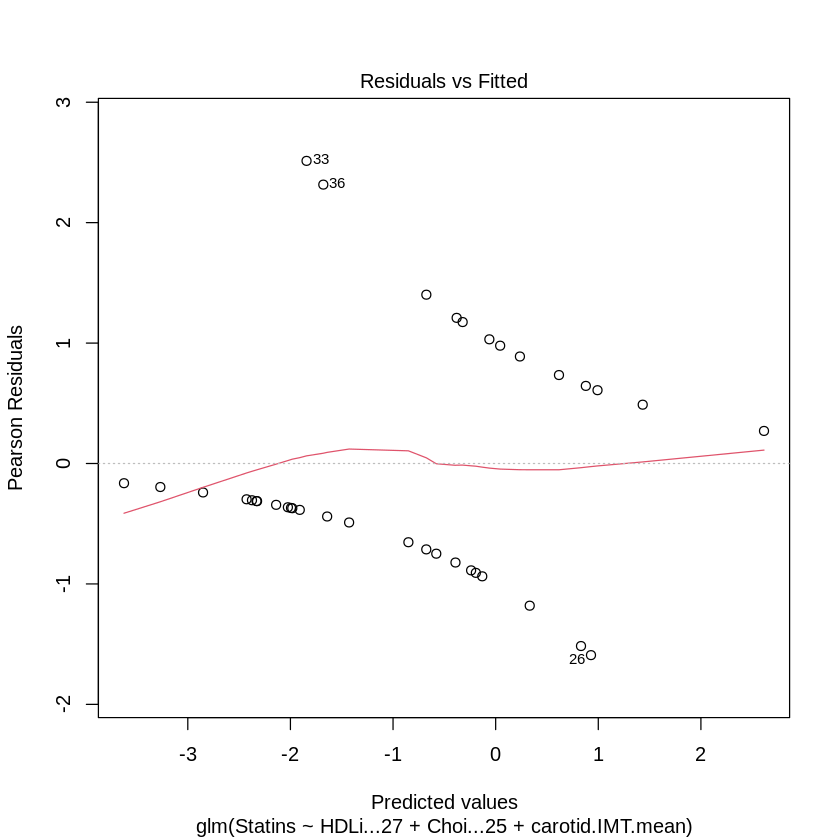

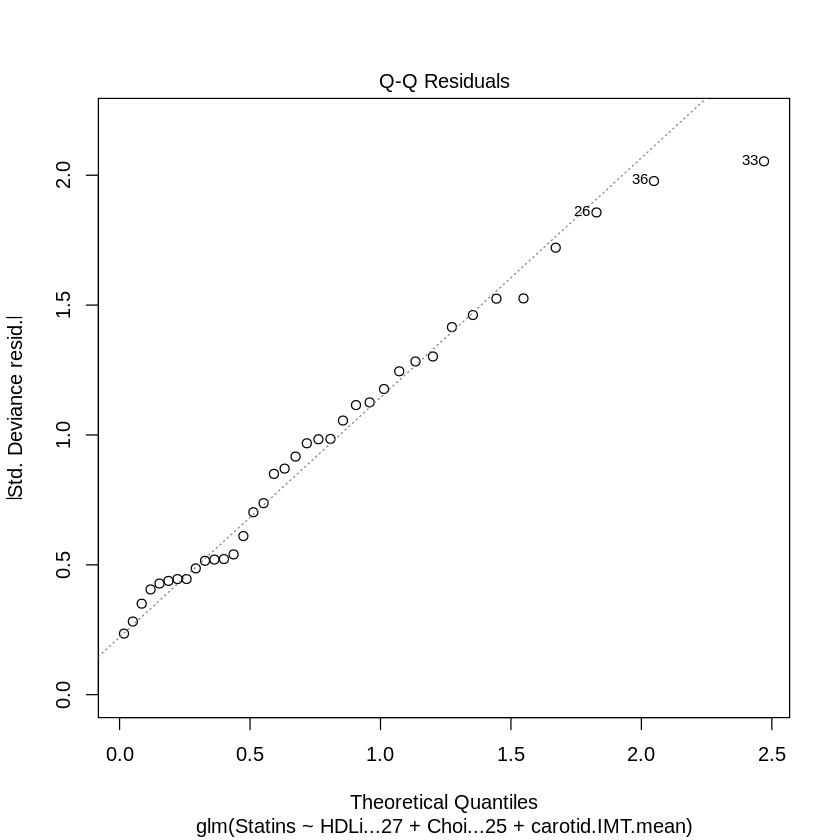

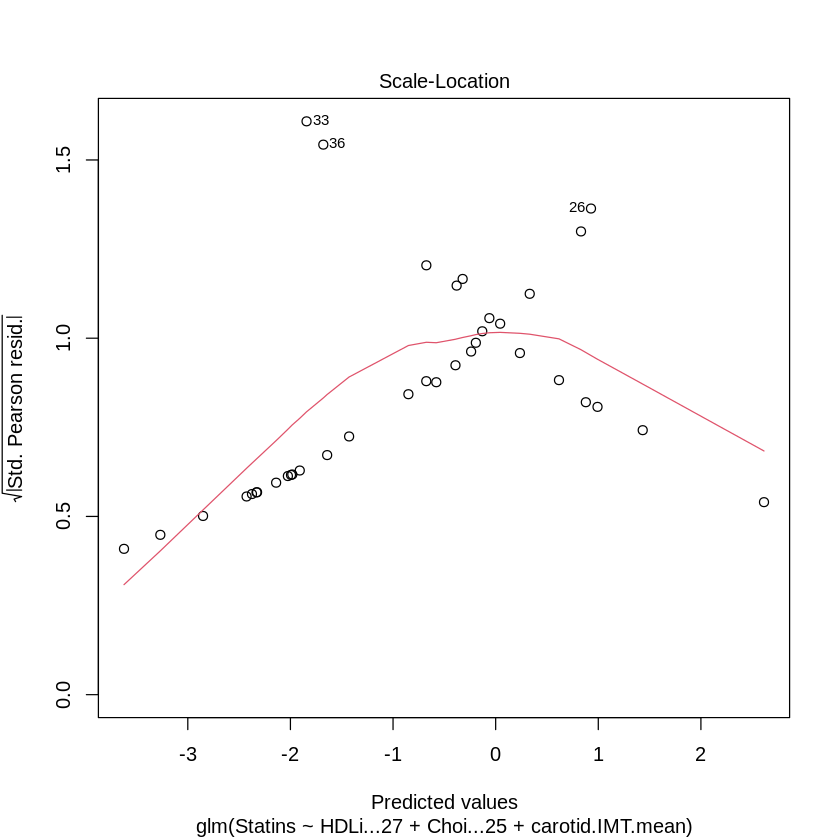

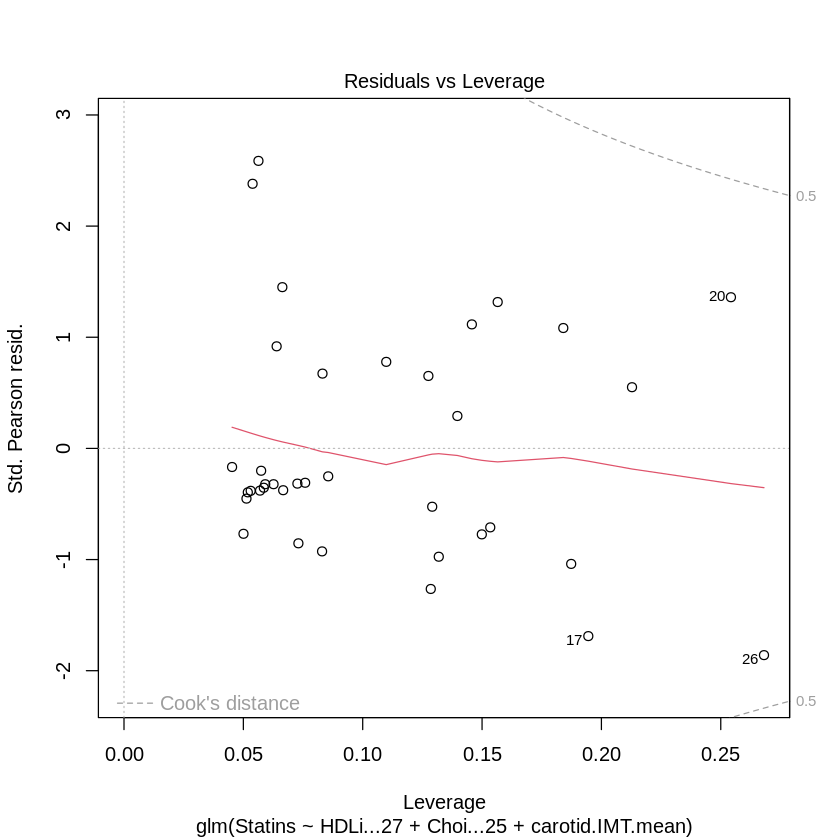

In [ ]:
plot(model_1)

In [ ]:
exp(model_1$coefficients)

(Intercept)        HDLi...27        Choi...25 carotid.IMT.mean 
      87.1354156        1.0311788        0.9672598        2.6378860

In [ ]:
exp(confint(model_1))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.005636487,2.414702e+06
HDLi...27,0.980725073,1.090318e+00
Choi...25,0.937968590,9.898469e-01
carotid.IMT.mean,0.004131331,2.644349e+03


In [ ]:
install.packages('AICcmodavg')
library ('AICcmodavg')

#define list of models
models <- list(model, model_1)

#specify model names
mod.names <- c('model', 'model_1')

#calculate AIC of each model
aictab(cand.set = models, modnames = mod.names)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TMB’, ‘RcppArmadillo’, ‘unmarked’, ‘VGAM’, ‘xtable’




,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,model,3,44.96483,0.000000,1.0000000,0.6373936,-19.11878,0.6373936
2,model_1,4,46.09297,1.128139,0.5688892,0.3626064,-18.42148,1.0000000


In [ ]:
set.seed(1234)
create_train_test <- function(data, size = 0.8, train = TRUE) {
    n_row = nrow(data)
    total_row = size * n_row
    train_sample <- 1: total_row
    if (train == TRUE) {
        return (data[train_sample, ])
    } else {
        return (data[-train_sample, ])
    }
}
data_test <- create_train_test(meta, 0.8, train = TRUE)

In [ ]:
predict <- predict(model, data_test, type = 'response')

In [ ]:
table_mat <- table(data_test$Statins, predict > 0.5)
table_mat

   
    FALSE TRUE
  0    16    5
  1     3    6

In [ ]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
accuracy_Test

[1] 0.7333333

- модель с параметрами, оценивающими наличие\отсутствие связи приема статинов и уровня Хс + ИМТ показала лучшие разультаты p-value.